In [4]:
all_txns = []

with open('/content/drive/MyDrive/AMA/Electronics_transactions.csv') as f:
    # Read each line from the file
    content = f.readlines()
    # Remove white space from the beginning and end of each line
    txns = [x.strip() for x in content if x.strip()]  # Ignore empty lines

    # Iterate through each line and create a list of transactions
    for each_txn in txns:
        # Split the transaction items by comma and filter out any empty items
        txn_items = [item for item in each_txn.split(',') if item]
        if txn_items:  # Only append non-empty transactions
            all_txns.append(txn_items)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
all_txns[0:10]

[['Mouse', 'Headphones', 'Charger', 'Printer', 'Game_Console'],
 ['Projector',
  'Smart_Home_Device',
  'Power_Bank',
  'USB_Cable',
  'Laptop',
  'External_Hard_Drive',
  'Charger'],
 ['Memory_Card', 'Charger', 'Tablet', 'Router', 'Printer', 'Smartphone'],
 ['Smartwatch',
  'Monitor',
  'Charger',
  'Wireless_Earbuds',
  'Headphones',
  'USB_Cable'],
 ['Printer', 'Smartphone', 'Game_Console', 'Bluetooth_Speaker', 'Charger'],
 ['Keyboard', 'Game_Console', 'Mouse', 'Projector', 'Speakers'],
 ['Tablet', 'Keyboard', 'Charger', 'Camera', 'Router'],
 ['Game_Console', 'Bluetooth_Speaker', 'Monitor', 'Webcam'],
 ['VR_Headset', 'Printer', 'Bluetooth_Speaker'],
 ['Memory_Card', 'Smartwatch', 'Bluetooth_Speaker']]

In [6]:
import pandas as pd
import numpy as np
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import warnings
warnings.filterwarnings('ignore')

In [7]:
one_hot_encoding = TransactionEncoder()
# Transform the data into one-hot-encoding format
one_hot_txns = one_hot_encoding.fit(all_txns).transform(all_txns)
# Conver the matrix into the dataframe.
one_hot_txns_df = pd.DataFrame(one_hot_txns,
                               columns=one_hot_encoding.columns_)

In [8]:
one_hot_txns_df.iloc[10:20, 10:20]

,Mouse,Power_Bank,Printer,Projector,Router,Smart_Home_Device,Smart_TV,Smartphone,Smartwatch,Speakers
10,False,False,False,True,True,False,False,False,False,False
11,False,False,False,False,False,False,False,False,False,False
12,False,False,True,False,False,False,False,False,False,False
13,True,False,True,False,False,False,False,False,False,False
14,False,False,True,False,True,False,False,False,True,False
15,False,False,True,False,False,False,False,True,False,True
16,True,False,False,False,False,False,False,False,False,False
17,True,False,False,False,False,True,False,True,True,False
18,True,False,True,False,False,False,False,False,False,False
19,False,False,False,False,False,False,False,False,False,False


In [9]:
one_hot_txns_df.shape

(5321, 25)

In [10]:
len(one_hot_txns_df.columns)

25

In [11]:
frequent_itemsets = apriori(one_hot_txns_df,
                            min_support=0.02,
                            use_colnames=True)

In [12]:
# Check if frequent_itemsets is empty before sampling
if len(frequent_itemsets) > 0:
    sample_df = frequent_itemsets.sample(10, random_state=90)
    print(sample_df)  # Or perform other operations with the sample
else:
    print("frequent_itemsets is empty. Cannot sample.")

      support                             itemsets
224  0.030821           (Smart_Home_Device, Mouse)
280  0.028754        (Smart_Home_Device, Smart_TV)
130  0.026499               (Game_Console, Tablet)
186  0.026123                 (VR_Headset, Laptop)
149  0.025183                 (Headphones, Tablet)
209  0.028378                    (Router, Monitor)
94   0.026499  (External_Hard_Drive, Game_Console)
247  0.028190                 (Printer, Projector)
283  0.026499        (Smart_Home_Device, Speakers)
272  0.024807                 (Smartphone, Router)


In [13]:
rules = association_rules(frequent_itemsets, # itemsets
                          metric="lift",     # lift
                          min_threshold=1, num_itemsets=10)

In [14]:
rules.sample(7)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
193,(Headphones),(Smartphone),0.152415,0.160308,0.025935,0.170160,1.061457,1.0,0.001502,1.011872,0.068310,0.090433,0.011733,0.165971
418,(USB_Cable),(Smartwatch),0.156362,0.160496,0.026875,0.171875,1.070898,1.0,0.001779,1.013741,0.078475,0.092677,0.013554,0.169661
252,(Laptop),(Wireless_Earbuds),0.161248,0.164067,0.026499,0.164336,1.001638,1.0,0.000043,1.000322,0.001950,0.088679,0.000322,0.162924
376,(Speakers),(Router),0.155986,0.153167,0.024807,0.159036,1.038321,1.0,0.000916,1.006979,0.043727,0.087244,0.006931,0.160500
432,(VR_Headset),(Tablet),0.158993,0.154294,0.024995,0.157210,1.018900,1.0,0.000464,1.003460,0.022056,0.086701,0.003448,0.159604
200,(Headphones),(VR_Headset),0.152415,0.158993,0.025747,0.168927,1.062485,1.0,0.001514,1.011954,0.069385,0.090132,0.011813,0.165433
235,(Laptop),(Printer),0.161248,0.158805,0.026499,0.164336,1.034828,1.0,0.000892,1.006619,0.040127,0.090269,0.006575,0.165600


In [15]:
rules.sort_values('confidence',
                   ascending = False)[0:10]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
83,(Charger),(Memory_Card),0.156737,0.173276,0.033828,0.215827,1.245572,1.0,0.006669,1.054263,0.233801,0.114213,0.051470,0.205528
261,(Projector),(Memory_Card),0.168014,0.173276,0.034768,0.206935,1.194254,1.0,0.005655,1.042442,0.195504,0.113427,0.040714,0.203793
24,(Smartphone),(Bluetooth_Speaker),0.160308,0.166134,0.032701,0.203986,1.227838,1.0,0.006068,1.047552,0.220987,0.111324,0.045393,0.200409
260,(Memory_Card),(Projector),0.173276,0.168014,0.034768,0.200651,1.194254,1.0,0.005655,1.040830,0.196749,0.113427,0.039228,0.203793
4,(Game_Console),(Bluetooth_Speaker),0.157677,0.166134,0.031385,0.199046,1.198107,1.0,0.005190,1.041091,0.196302,0.107326,0.039470,0.193980
281,(Monitor),(Power_Bank),0.162375,0.162563,0.032137,0.197917,1.217474,1.0,0.005740,1.044077,0.213254,0.109756,0.042216,0.197802
280,(Power_Bank),(Monitor),0.162563,0.162375,0.032137,0.197688,1.217474,1.0,0.005740,1.044013,0.213302,0.109756,0.042158,0.197802
314,(Webcam),(Mouse),0.161624,0.165382,0.031949,0.197674,1.195256,1.0,0.005219,1.040248,0.194852,0.108280,0.038691,0.195428
359,(Tablet),(Projector),0.154294,0.168014,0.030445,0.197320,1.174431,1.0,0.004522,1.036511,0.175621,0.104314,0.035225,0.189264
25,(Bluetooth_Speaker),(Smartphone),0.166134,0.160308,0.032701,0.196833,1.227838,1.0,0.006068,1.045475,0.222530,0.111324,0.043497,0.200409


In [16]:
rules.sort_values('lift',
                   ascending = False)[0:10]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
82,(Memory_Card),(Charger),0.173276,0.156737,0.033828,0.195228,1.245572,1.0,0.006669,1.047828,0.238478,0.114213,0.045645,0.205528
83,(Charger),(Memory_Card),0.156737,0.173276,0.033828,0.215827,1.245572,1.0,0.006669,1.054263,0.233801,0.114213,0.051470,0.205528
25,(Bluetooth_Speaker),(Smartphone),0.166134,0.160308,0.032701,0.196833,1.227838,1.0,0.006068,1.045475,0.222530,0.111324,0.043497,0.200409
24,(Smartphone),(Bluetooth_Speaker),0.160308,0.166134,0.032701,0.203986,1.227838,1.0,0.006068,1.047552,0.220987,0.111324,0.045393,0.200409
280,(Power_Bank),(Monitor),0.162563,0.162375,0.032137,0.197688,1.217474,1.0,0.005740,1.044013,0.213302,0.109756,0.042158,0.197802
281,(Monitor),(Power_Bank),0.162375,0.162563,0.032137,0.197917,1.217474,1.0,0.005740,1.044077,0.213254,0.109756,0.042216,0.197802
55,(Router),(Camera),0.153167,0.156550,0.028754,0.187730,1.199174,1.0,0.004776,1.038387,0.196134,0.102341,0.036968,0.185702
54,(Camera),(Router),0.156550,0.153167,0.028754,0.183673,1.199174,1.0,0.004776,1.037371,0.196920,0.102341,0.036025,0.185702
174,(Game_Console),(Wireless_Earbuds),0.157677,0.164067,0.031009,0.196663,1.198674,1.0,0.005140,1.040575,0.196771,0.106658,0.038993,0.192833
175,(Wireless_Earbuds),(Game_Console),0.164067,0.157677,0.031009,0.189003,1.198674,1.0,0.005140,1.038627,0.198275,0.106658,0.037190,0.192833


In [17]:
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Camera),(Bluetooth_Speaker),0.156550,0.166134,0.026875,0.171669,1.033313,1.0,0.000866,1.006681,0.038223,0.090851,0.006637,0.166717
1,(Bluetooth_Speaker),(Camera),0.166134,0.156550,0.026875,0.161765,1.033313,1.0,0.000866,1.006222,0.038662,0.090851,0.006183,0.166717
2,(Bluetooth_Speaker),(Charger),0.166134,0.156737,0.026311,0.158371,1.010422,1.0,0.000271,1.001941,0.012370,0.088720,0.001937,0.163118
3,(Charger),(Bluetooth_Speaker),0.156737,0.166134,0.026311,0.167866,1.010422,1.0,0.000271,1.002081,0.012232,0.088720,0.002076,0.163118
4,(Game_Console),(Bluetooth_Speaker),0.157677,0.166134,0.031385,0.199046,1.198107,1.0,0.005190,1.041091,0.196302,0.107326,0.039470,0.193980


In [18]:
 top10_rules = rules.sort_values(by='confidence', ascending=False).head(10)

In [19]:
print(top10_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

             antecedents          consequents   support  confidence      lift
83             (Charger)        (Memory_Card)  0.033828    0.215827  1.245572
261          (Projector)        (Memory_Card)  0.034768    0.206935  1.194254
24          (Smartphone)  (Bluetooth_Speaker)  0.032701    0.203986  1.227838
260        (Memory_Card)          (Projector)  0.034768    0.200651  1.194254
4         (Game_Console)  (Bluetooth_Speaker)  0.031385    0.199046  1.198107
281            (Monitor)         (Power_Bank)  0.032137    0.197917  1.217474
280         (Power_Bank)            (Monitor)  0.032137    0.197688  1.217474
314             (Webcam)              (Mouse)  0.031949    0.197674  1.195256
359             (Tablet)          (Projector)  0.030445    0.197320  1.174431
25   (Bluetooth_Speaker)         (Smartphone)  0.032701    0.196833  1.227838


In [20]:
!pip install pandas mlxtend matplotlib networkx

In [21]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

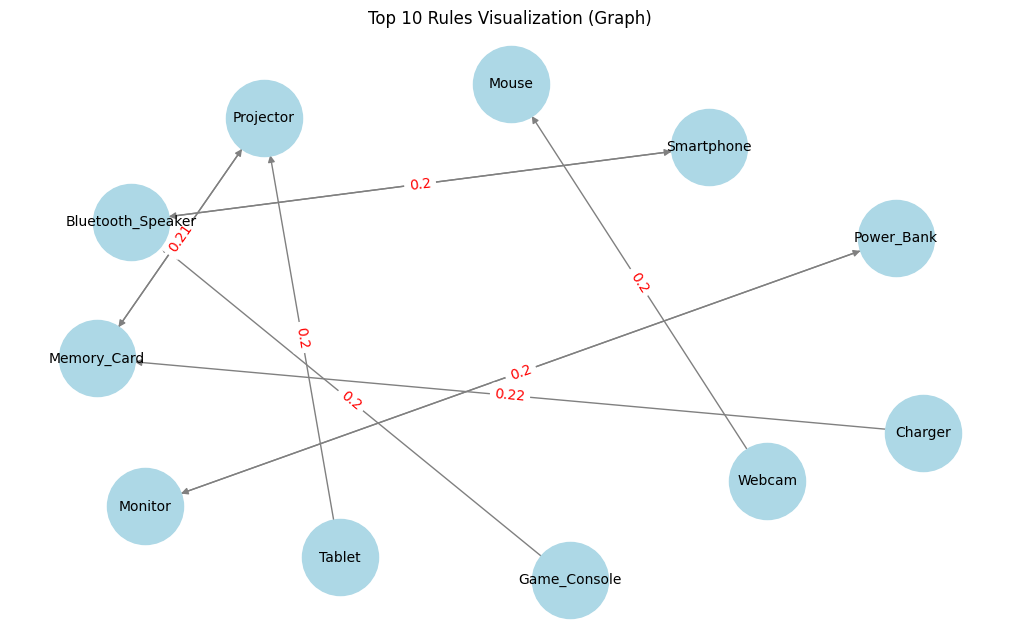

In [22]:
plt.figure(figsize=(10, 6))
G = nx.DiGraph()

# Add nodes and edges for top 10 rules
for idx, rule in top10_rules.iterrows():
    for item in rule['antecedents']:
        G.add_node(item, label=item)
    for item in rule['consequents']:
        G.add_node(item, label=item)
    G.add_edge(list(rule['antecedents'])[0], list(rule['consequents'])[0], weight=rule['confidence'])

# Create a layout for the graph
pos = nx.spring_layout(G, k=2)

# Draw the graph
nx.draw(G, pos, with_labels=True, node_color='lightblue', font_size=10, node_size=3000, edge_color='gray', arrows=True)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels={k: round(v, 2) for k, v in labels.items()}, font_color='red')

# Show the plot
plt.title("Top 10 Rules Visualization (Graph)")
plt.show()

**INTERPRETATIONS**

1.**Smartphone and Accessory Pairings:**

 Smartphones have strong associations with Bluetooth Speakers and Power Banks. This suggests that customers who purchase smartphones often look for complementary accessories.

**Action:**
Offer bundled deals with Smartphones, Power Banks, and Bluetooth Speakers
Highlight accessory suggestions during the checkout process in online stores.

2.**Memory Cards and Gaming Devices:**

Memory Cards are closely associated with Game Consoles. This indicates that gamers often purchase additional storage for their devices.

**Action:**
Bundle Memory Cards with Game Consoles in promotional offers.
Market larger-capacity memory cards to gamers through targeted ads

3.**Projectors and Tablets**:

Projectors are linked with Tablets, suggesting that customers may use tablets for presentations or entertainment that require a projector.

**Action**:
Promote “Home Office” or “Home Theater” bundles, including a Tablet, Projector, and possibly a Bluetooth Speaker.

4.**Chargers and Portable Devices**:

Chargers are associated with portable devices like Smartphones and Power Banks, showing demand for charging solutions alongside device purchases.

**Action**:
Offer multi-device chargers or fast chargers as add-on suggestions for Smartphone and Power Bank buyers.
Introduce loyalty program rewards for repeat purchases of chargers.

5.**Monitors and Webcams**:

Monitors are associated with Webcams, indicating use for remote work or streaming setups.

**Action**:
Run promotions targeting the work-from-home market, bundling Monitors, Webcams, and Bluetooth Speakers.
Advertise these products on platforms used by remote workers and online streame